# EDA

In [45]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
#import researchpy as rp
from scipy.stats import levene

from datetime import datetime
import calendar

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8) 

In [46]:
df= pd.read_csv("datos/bikes.csv", index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,spring,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [48]:
df.shape

(730, 16)

In [49]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [50]:
df.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [52]:
df.describe(include="object").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


## Valores únicos

In [53]:
df_categoricas = df.select_dtypes(include="object")

In [54]:
df_numericas = df.select_dtypes(include=np.number)

In [55]:
# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario
df_valoresunicos = pd.DataFrame.from_dict(datos)
df_valoresunicos

,variable,n_uniques
0,instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201..."
2,season,"[spring, summer, autumn, winter]"
3,yr,"[0, 1]"
4,mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,holiday,"[0, 1]"
6,weekday,"[6, 0, 1, 2, 3, 4, 5]"
7,workingday,"[0, 1]"
8,weathersit,"[2, 1, 3]"
9,temp,"[14.110847, 14.902598, 8.050924, 8.2, 9.305237..."


## Duplicados

In [56]:
df.duplicated().sum()

0

## Nulos

In [57]:
df.stb.missing()

,missing,total,percent
instant,0,730,0.0
dteday,0,730,0.0
season,0,730,0.0
yr,0,730,0.0
mnth,0,730,0.0
holiday,0,730,0.0
weekday,0,730,0.0
workingday,0,730,0.0
weathersit,0,730,0.0
temp,0,730,0.0


## Detección de outliers

In [58]:
lista_numericas = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

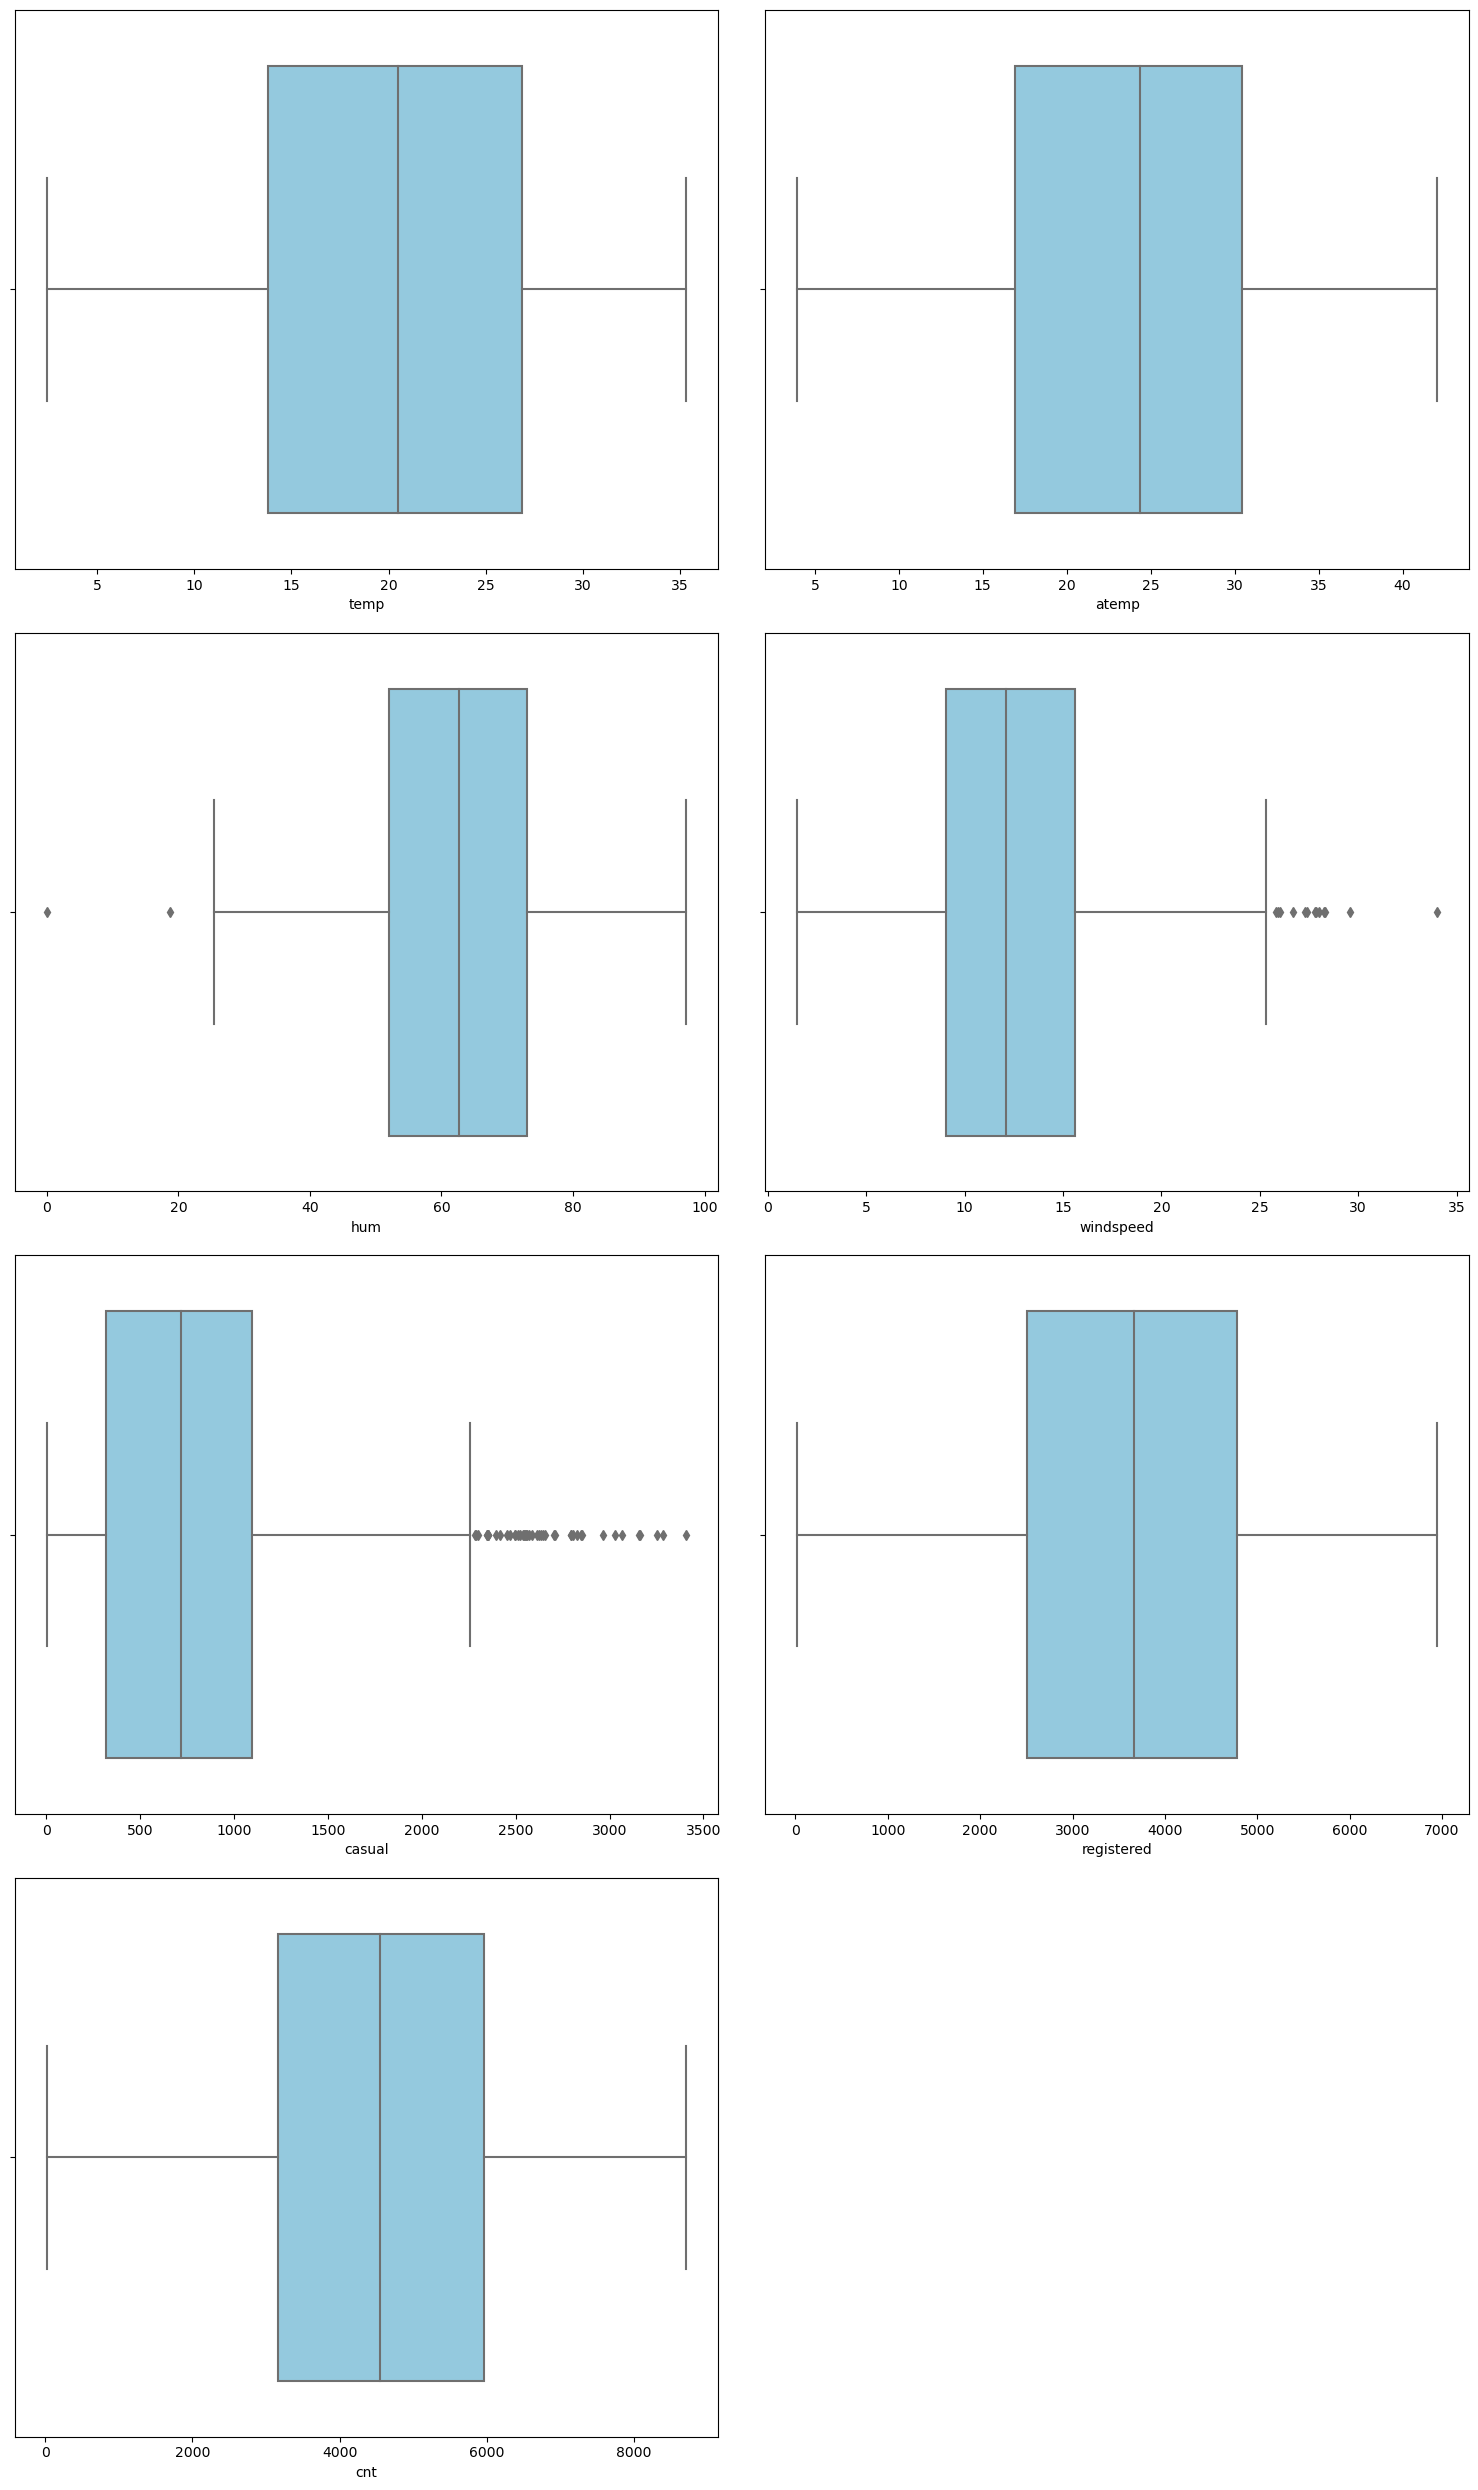

In [59]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_numericas):
    sns.boxplot(x = df_numericas[columna], data = df, ax=axes[indice], color = "skyblue"); # para trazar una línea de densidad

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

## Matriz de correlación

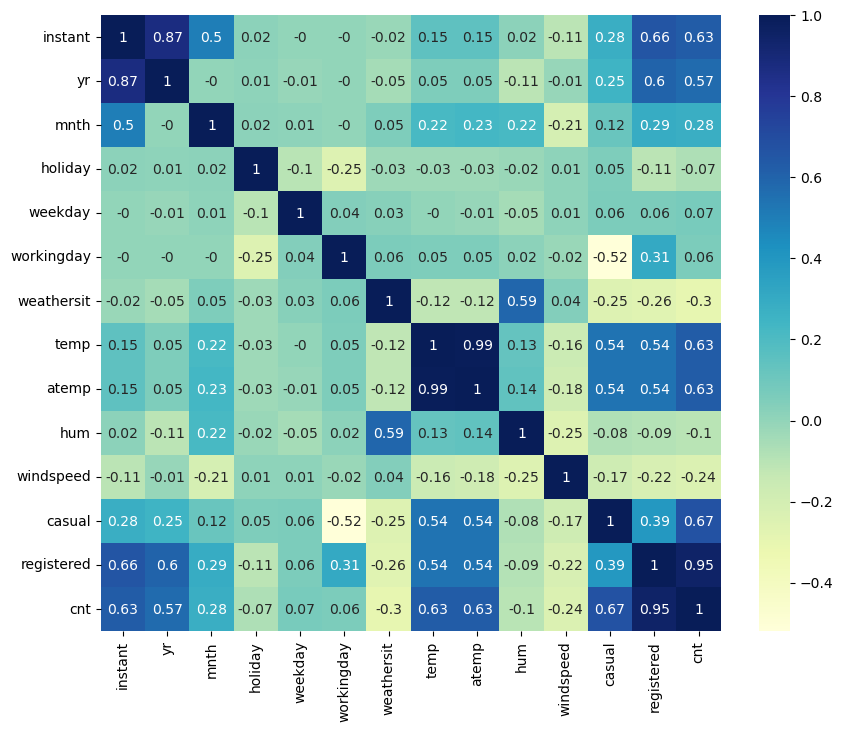

In [60]:
sns.heatmap(round(df.corr(),2), cmap = "YlGnBu", annot = True);

## Renombrar columnas

In [61]:
df.reset_index(inplace=True)

In [62]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

In [63]:
df.rename(columns = cambio_columnas, inplace=True)

In [64]:
df.columns

Index(['index', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

### Cambio a tipo datatime columna dteday

In [65]:
df2 = df.copy()

In [66]:
df2["dteday"] = pd.to_datetime(df2["dteday"], dayfirst=True)

In [67]:
df2.dtypes

index                  int64
instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Limpieza columna season

In [68]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [69]:
df2.insert(3,"estaciones", df2['dteday'].map(season_of_date))

In [70]:
df2.head(10)

,index,instant,dteday,estaciones,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,winter,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-01-02,winter,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2,3,2018-01-03,winter,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,3,4,2018-01-04,winter,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,4,5,2018-01-05,winter,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,5,6,2018-01-06,winter,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,6,7,2018-01-07,winter,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,7,8,2018-01-08,winter,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,8,9,2018-01-09,winter,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,9,10,2018-01-10,winter,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Limpieza columna días de la semana

In [71]:
def dia_semana_num(dia):
    # Función para obtener el número de día, según la fecha
    # Codificado 0-monday, 1-tuesday, hasta 6-sunday
    return dia.weekday()

In [72]:
df2.insert(9, "weekday_num", df2["dteday"].apply(dia_semana_num))

In [73]:
df2.head(10)

,index,instant,dteday,estaciones,season,yr,mnth,holiday,weekday,weekday_num,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,winter,spring,0,1,0,6,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-01-02,winter,spring,0,1,0,0,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2,3,2018-01-03,winter,spring,0,1,0,1,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,3,4,2018-01-04,winter,spring,0,1,0,2,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,4,5,2018-01-05,winter,spring,0,1,0,3,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,5,6,2018-01-06,winter,spring,0,1,0,4,5,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,6,7,2018-01-07,winter,spring,0,1,0,5,6,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,7,8,2018-01-08,winter,spring,0,1,0,6,0,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,8,9,2018-01-09,winter,spring,0,1,0,0,1,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,9,10,2018-01-10,winter,spring,0,1,0,1,2,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Creación columna workingday correcta

In [74]:
def workingday_num(dia):
    # Función que devuelve 0 si es sábado, domingo o festivo. 1 en lo contrario
    
    # Diccionario de festivos
    festivos = {'01-01': 'New Years Day', 
        '16-01': 'Martin Luther King’s Birthday', 
        '13-02': 'Lincolns Birthday', 
        '20-02': 'President’s Day', 
        '31-03': 'Cesar Chavez’ Birthday', 
        '29-05': 'Memorial Day', 
        '04-07': 'Independence Day', 
        '05-07': 'Bloody Thursday', 
        '28-07': 'Harry Bridges’ Birthday', 
        '04-09': 'Labor Day', 
        '10-11': 'Veterans’ Day', 
        '23-11': 'Thanksgiving Day', 
        '24-11': 'Day After Thanksgiving', 
        '24-12': 'Christmas Eve', 
        '25-12': 'Christmas Day', 
        '31-12': 'New Year’s Eve'}
    
    # Si es fin de semana
    if (dia.weekday() == 5) or (dia.weekday() == 6):
        return 0
    else:
        # Si es festivo
        dia_festivo = datetime.strftime(dia, '%d-%m')
        if dia_festivo in festivos.keys():
            return 0
        else:
            # Si es día laborable
            return 1

In [75]:
df2.insert(11, "workingday_num", df2["dteday"].apply(workingday_num))

In [76]:
df2.head(10)

,index,instant,dteday,estaciones,season,yr,mnth,holiday,weekday,weekday_num,workingday,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,winter,spring,0,1,0,6,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-01-02,winter,spring,0,1,0,0,1,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2,3,2018-01-03,winter,spring,0,1,0,1,2,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,3,4,2018-01-04,winter,spring,0,1,0,2,3,1,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,4,5,2018-01-05,winter,spring,0,1,0,3,4,1,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,5,6,2018-01-06,winter,spring,0,1,0,4,5,1,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,6,7,2018-01-07,winter,spring,0,1,0,5,6,1,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,7,8,2018-01-08,winter,spring,0,1,0,6,0,0,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,8,9,2018-01-09,winter,spring,0,1,0,0,1,0,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,9,10,2018-01-10,winter,spring,0,1,0,1,2,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Creación columna holiday correcta

### Tratamiento de outliers

In [77]:
def detectar_outliers(lista_columnas, dataframe): 

    dicc_indices = {}

    for col in lista_columnas:        
        
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
         
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index)) 
            
    return dicc_indices  

In [78]:
numericas2 = ['temp', 'atemp', 'hum', 'windspeed']

In [79]:
index_out = detectar_outliers(numericas2, df2)

### Gestión de los outliers

In [80]:
for k, v in index_out.items():
    median = df2[k].median()
    for i in v:
        df2.loc[i,k] = median

### Eliminamos aquellas columnas no depuradas

In [81]:
lista_eliminar = ['season', 'workingday', 'weekday']

In [82]:
df2.drop(lista_eliminar, axis = 1, inplace=True)

In [83]:
df2.head(2)

,index,instant,dteday,estaciones,yr,mnth,holiday,weekday_num,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,winter,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-01-02,winter,0,1,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801


### Guardamos los datos

In [84]:
df2.to_csv("datos/2.bikes.csv")

In [85]:
df2.to_pickle("datos/2.bikes.pkl")